## **Batch Normalization**

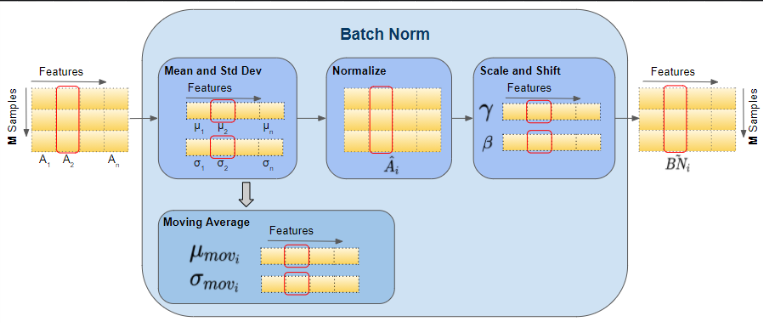

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from keras import layers
import keras

In [4]:
X, y = make_classification(
    n_samples=600,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    class_sep=0.9,
    random_state=42
)

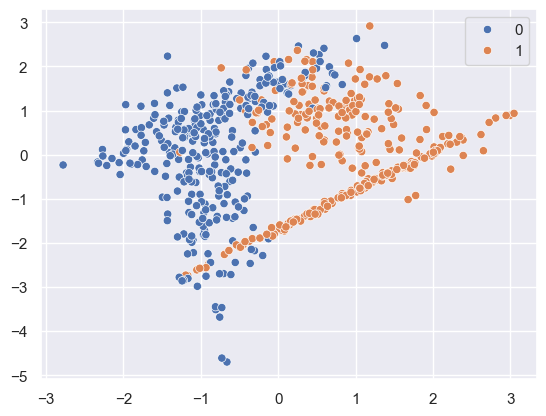

In [6]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Without BatchNormalization**

In [13]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history1 = model.fit(
    x_train, y_train,
    epochs=200,
    validation_split=0.2,
    verbose = 0
)

### **Using Regularization**

#### **Applying after activation fn**

In [17]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(3, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(2, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [18]:
history2 = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    verbose=0
)

### **BNormalization before activation**

In [26]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(3, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(2, use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
)

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 10 (40.00 B)

In [27]:
history3 = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    verbose=0
)

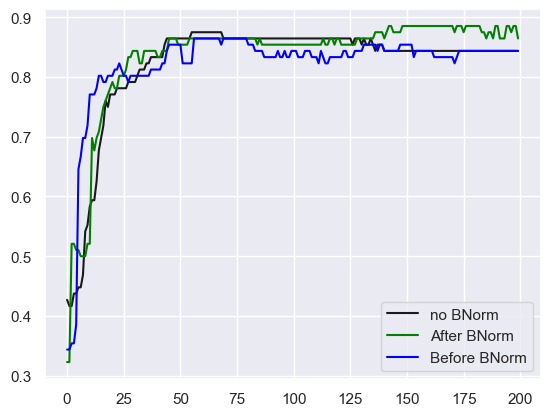

In [28]:
# plotting the accuracies with the models achievements

plt.plot(history1.history['val_accuracy'], color='k', label='no BNorm')
plt.plot(history2.history['val_accuracy'], color='green', label='After BNorm')
plt.plot(history3.history['val_accuracy'], color='blue', label='Before BNorm')
plt.legend()
plt.show()

We can observe the subtle difference in faster convergence.

If Data is more or more complex,then we observe the differnce very clearly